# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy
import re

#For Visualization
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

import matplotlib
matplotlib.use('nbagg')

import seaborn as sns


#Data Preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


#For Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#For Model Evaluation
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_auc_score,f1_score,recall_score,precision_score,plot_confusion_matrix,confusion_matrix,classification_report

#Classification Models
from catboost import CatBoostClassifier, Pool, cv
from lightgbm import LGBMClassifier


import warnings

warnings.simplefilter('ignore')

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
%matplotlib inline

In [2]:
data=pd.read_csv("train.csv")

In [3]:
data=data.drop(columns=['Unnamed: 0'])
data.head()

,id,publisherAppSize,publisherAppPrice(in USD),publisherAppRatingTotal,publisherAppUserRating,publisherAppAgeRating,publisherAppGenre,country,gender,age,device,type,value,AdvertiserAppSize,AdvertiserAppPrice(in USD),AdvertiserAppTotalRating,AdvertiserAppUserRating,AdvertiserAppAgeRating,AdvertiserAppGenre,clicked
0,1,68217856,0.99,0,0.0,3,7,79,0,40,1,CPM,2.226520,52120576,0.99,14,5.0,4,0,1
1,2,262118400,0.00,0,0.0,1,7,12,0,36,3,CPM,2.440259,53506048,2.99,96,4.5,1,6,1
2,3,90249216,2.99,0,0.0,4,14,99,1,43,3,CPM,1.186457,65553408,1.99,309,4.0,1,6,0
3,4,68122624,0.00,10275,4.5,1,7,229,0,30,0,CPM,2.843841,11611136,2.99,185,2.5,1,6,0
4,5,64692224,0.00,3731,4.5,1,7,99,0,24,2,CPM,2.029833,114951168,0.00,51,3.5,2,12,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980239 entries, 0 to 980238
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          980239 non-null  int64  
 1   publisherAppSize            980239 non-null  int64  
 2   publisherAppPrice(in USD)   980239 non-null  float64
 3   publisherAppRatingTotal     980239 non-null  int64  
 4   publisherAppUserRating      980239 non-null  float64
 5   publisherAppAgeRating       980239 non-null  int64  
 6   publisherAppGenre           980239 non-null  int64  
 7   country                     980239 non-null  int64  
 8   gender                      980239 non-null  int64  
 9   age                         980239 non-null  int64  
 10  device                      980239 non-null  int64  
 11  type                        980239 non-null  object 
 12  value                       980239 non-null  float64
 13  AdvertiserAppS

In [5]:
test=pd.read_csv("test.csv")

In [6]:
test=test.drop(columns=['Unnamed: 0'])
test.head()

,id,publisherAppSize,publisherAppPrice(in USD),publisherAppRatingTotal,publisherAppUserRating,publisherAppAgeRating,publisherAppGenre,country,gender,age,device,type,value,AdvertiserAppSize,AdvertiserAppPrice(in USD),AdvertiserAppTotalRating,AdvertiserAppUserRating,AdvertiserAppAgeRating,AdvertiserAppGenre,click
0,1,58732544,0.00,0,0.0,1,7,113,1,43,1,CPM,2.464701,83624960,0.0,17,3.5,1,2,NaN
1,10776,50076672,0.00,0,0.0,4,18,94,1,39,2,CPM,2.464701,83624960,0.0,17,3.5,1,2,NaN
2,9990,11674624,0.00,243,4.0,3,14,79,1,34,2,CPM,2.464701,83624960,0.0,17,3.5,1,2,NaN
3,8566,56807424,0.00,366,4.5,2,7,231,1,20,3,CPM,2.464701,83624960,0.0,17,3.5,1,2,NaN
4,75125,343991296,2.99,12,2.5,1,4,231,1,38,3,CPM,2.464701,83624960,0.0,17,3.5,1,2,NaN


# EXPLORATORY DATA ANALYSIS

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980239 entries, 0 to 980238
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          980239 non-null  int64  
 1   publisherAppSize            980239 non-null  int64  
 2   publisherAppPrice(in USD)   980239 non-null  float64
 3   publisherAppRatingTotal     980239 non-null  int64  
 4   publisherAppUserRating      980239 non-null  float64
 5   publisherAppAgeRating       980239 non-null  int64  
 6   publisherAppGenre           980239 non-null  int64  
 7   country                     980239 non-null  int64  
 8   gender                      980239 non-null  int64  
 9   age                         980239 non-null  int64  
 10  device                      980239 non-null  int64  
 11  type                        980239 non-null  object 
 12  value                       980239 non-null  float64
 13  AdvertiserAppS

In [8]:
data['type'].unique()

array(['CPM', 'CPC'], dtype=object)

In [9]:
data.describe()

,id,publisherAppSize,publisherAppPrice(in USD),publisherAppRatingTotal,publisherAppUserRating,publisherAppAgeRating,publisherAppGenre,country,gender,age,device,value,AdvertiserAppSize,AdvertiserAppPrice(in USD),AdvertiserAppTotalRating,AdvertiserAppUserRating,AdvertiserAppAgeRating,AdvertiserAppGenre,clicked
count,980239.000000,9.802390e+05,980239.000000,9.802390e+05,980239.000000,980239.000000,980239.00000,980239.000000,980239.000000,980239.000000,980239.000000,980239.000000,9.802390e+05,980239.000000,980239.000000,980239.000000,980239.000000,980239.00000,980239.000000
mean,499957.740100,1.989464e+08,1.713317,1.292711e+04,3.525248,1.717638,8.58077,166.217393,0.506634,29.381956,1.514531,1.093082,2.124927e+08,1.731739,12517.055135,3.641600,1.735562,7.00456,0.240100
std,288688.354656,3.588559e+08,5.621658,7.704952e+04,1.519703,1.021763,4.86877,83.016613,0.499956,8.693812,1.114195,0.989102,3.617676e+08,3.405428,57216.936289,1.429354,1.020254,4.13973,0.427144
min,1.000000,5.898240e+05,0.000000,0.000000e+00,0.000000,1.000000,0.00000,0.000000,0.000000,15.000000,0.000000,0.100801,6.717440e+05,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,249893.500000,4.692275e+07,0.000000,2.700000e+01,3.500000,1.000000,7.00000,79.000000,0.000000,22.000000,1.000000,0.194417,4.811162e+07,0.000000,34.000000,3.500000,1.000000,6.00000,0.000000
50%,499965.000000,9.715302e+07,0.000000,3.000000e+02,4.000000,1.000000,7.00000,229.000000,1.000000,29.000000,2.000000,0.295711,9.956864e+07,0.000000,307.000000,4.000000,1.000000,6.00000,0.000000
75%,749995.500000,1.816289e+08,1.990000,2.793000e+03,4.500000,2.000000,9.00000,231.000000,1.000000,37.000000,3.000000,2.029833,1.976832e+08,2.990000,2798.000000,4.500000,3.000000,7.00000,0.000000
max,1000000.000000,4.025970e+09,299.990000,2.974676e+06,5.000000,4.000000,22.00000,243.000000,1.000000,44.000000,3.000000,2.991717,3.008276e+09,39.990000,878563.000000,5.000000,4.000000,20.00000,1.000000


<AxesSubplot:xlabel='clicked', ylabel='count'>

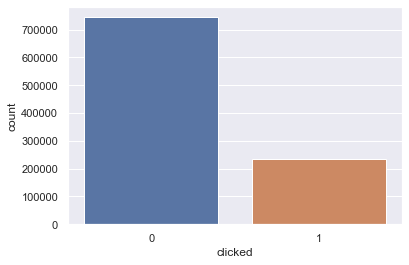

In [10]:
sns.set_theme(style="darkgrid")
sns.countplot(x='clicked',data=data)

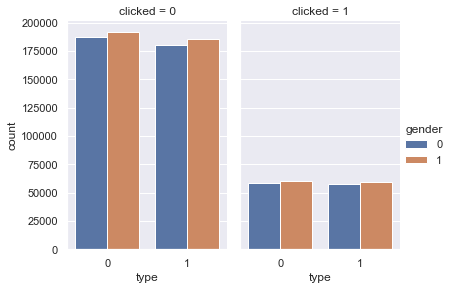

In [39]:
g = sns.catplot(x="type", hue="gender", col="clicked",
                data=data, kind="count",
                height=4, aspect=.7);

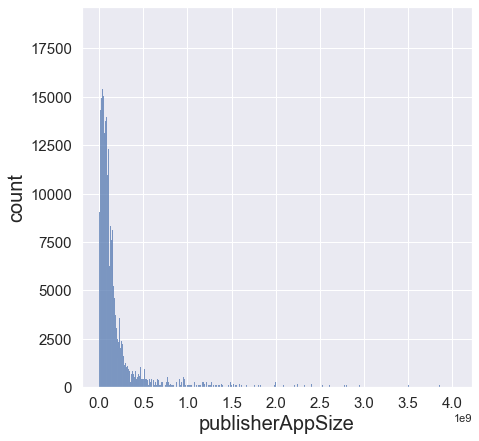

In [48]:
plt.figure(figsize=(7,7))
sns.histplot(data=data,x='publisherAppSize')
plt.xticks(size=15,rotation=0)
plt.yticks(size=15)
plt.xlabel('publisherAppSize',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.show()

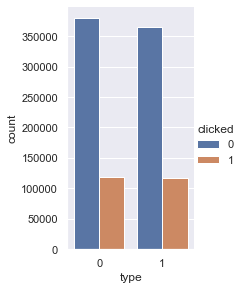

In [43]:
g = sns.catplot(x="type", hue="clicked",
                data=data, kind="count",
                height=4, aspect=.7);

<AxesSubplot:xlabel='publisherAppAgeRating', ylabel='count'>

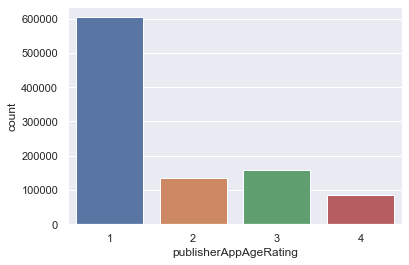

In [41]:
sns.countplot(x='publisherAppAgeRating',data=data)

<AxesSubplot:xlabel='clicked', ylabel='publisherAppSize'>

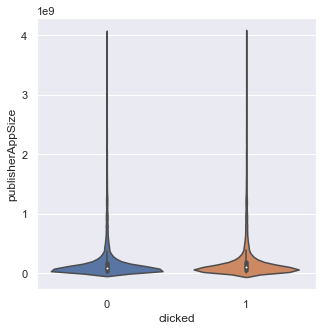

In [49]:

fig, ax = plt.subplots(figsize =(5, 5))
sns.violinplot(ax = ax, x = data["clicked"], 
                  y = data["publisherAppSize"] )

In [12]:
tempdata=data
tempdata1=data
tempdata_CPM = tempdata.loc[tempdata['type'] == 'CPM']
tempdata_CPC = tempdata1.loc[tempdata1['type'] == 'CPC']

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = tempdata_CPC["clicked"], 
                  y = tempdata_CPC['value'] )

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax, x = tempdata_CPM["clicked"], 
                  y = tempdata_CPM['value'] )

In [ ]:
tempdata_CPM['value'].max()

In [13]:
tempdata_CPM

,id,publisherAppSize,publisherAppPrice(in USD),publisherAppRatingTotal,publisherAppUserRating,publisherAppAgeRating,publisherAppGenre,country,gender,age,device,type,value,AdvertiserAppSize,AdvertiserAppPrice(in USD),AdvertiserAppTotalRating,AdvertiserAppUserRating,AdvertiserAppAgeRating,AdvertiserAppGenre,clicked
0,1,68217856,0.99,0,0.0,3,7,79,0,40,1,CPM,2.226520,52120576,0.99,14,5.0,4,0,1
1,2,262118400,0.00,0,0.0,1,7,12,0,36,3,CPM,2.440259,53506048,2.99,96,4.5,1,6,1
2,3,90249216,2.99,0,0.0,4,14,99,1,43,3,CPM,1.186457,65553408,1.99,309,4.0,1,6,0
3,4,68122624,0.00,10275,4.5,1,7,229,0,30,0,CPM,2.843841,11611136,2.99,185,2.5,1,6,0
4,5,64692224,0.00,3731,4.5,1,7,99,0,24,2,CPM,2.029833,114951168,0.00,51,3.5,2,12,0


# Best Features Extraction

In [7]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])
#test['type']= label_encoder.fit_transform(test['type'])

In [15]:
x.corr()['clicked']

publisherAppSize              0.010677
publisherAppPrice(in USD)    -0.002588
publisherAppRatingTotal      -0.000518
publisherAppUserRating        0.006207
publisherAppAgeRating         0.001006
publisherAppGenre            -0.015496
country                       0.001276
gender                       -0.001418
age                           0.000448
device                       -0.000031
type                          0.004000
value                         0.005998
AdvertiserAppSize            -0.000918
AdvertiserAppPrice(in USD)    0.006405
AdvertiserAppTotalRating     -0.000023
AdvertiserAppUserRating       0.000849
AdvertiserAppAgeRating        0.000187
AdvertiserAppGenre            0.008367
clicked                       1.000000
Name: clicked, dtype: float64

In [16]:
x=data.drop(columns=['id','clicked'])
y=data['clicked']

In [17]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

#x = x.astype(int)


#X=SelectKBest(score_func=chi2,k=7).fit_transform(x,y)

#print('o', x.shape[1])
#print('r',X.shape[1])

In [18]:
#X=pd.DataFrame(X)
#X.head()

In [19]:
#x.head()

In [20]:
X_ = data.loc[data['type'] == 0]

In [21]:
X=X_[['publisherAppSize','publisherAppRatingTotal','publisherAppGenre','value','AdvertiserAppSize',
              'AdvertiserAppPrice(in USD)','AdvertiserAppTotalRating','AdvertiserAppGenre']]
test=test[['publisherAppSize','publisherAppRatingTotal','publisherAppGenre','value','AdvertiserAppSize',
              'AdvertiserAppPrice(in USD)','AdvertiserAppTotalRating','AdvertiserAppGenre']]
y=X_['clicked']

# Scalling

In [22]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X= st_x.fit_transform(X)    
test= st_x.transform(test) 

# Modelling

#XGBOOST

In [27]:
def classification_model_evaluation(model,x_train,y_train,x_test,y_test):
    print("####################### model Evalution started #######################")
    train_pre = model.predict(x_train)
    test_pre = model.predict(x_test)
    train_pro = model.predict_proba(x_train)[:,1]
    test_pro = model.predict_proba(x_test)[:,1]

    print("Train Accuracy: {0} \t Test Accuracy: {1}".format(accuracy_score(y_train, train_pre),accuracy_score(y_test,test_pre)))
    print("Train Log Loss: {0} \t Test Log Loss: {1}".format(log_loss(y_train, train_pro),log_loss(y_test,test_pro)))
    print("Train AUC: {0} \t\t Test AUC: {1}".format(roc_auc_score(y_train, train_pro,multi_class='ovo'),roc_auc_score(y_test,test_pro,multi_class='ovo')))
    print("Train F1: {0} \t\t Test F1: {1}".format(f1_score(y_train, train_pre,average='weighted'),f1_score(y_test,test_pre,average='weighted')))
    print("Train recall: {0} \t Test recall: {1}".format(recall_score(y_train, train_pre,average='weighted'),recall_score(y_test,test_pre,average='weighted')))
    print("Train precision: {0} \t Test Precision: {1}".format(precision_score(y_train, train_pre,average='weighted'),precision_score(y_test,test_pre,average='weighted')))
    print()
    print("Train Classification report: \n{0} \n Test classification report: \n{1}".format(classification_report(y_train, train_pre),classification_report(y_test,test_pre)))
    

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)
X_valid=X_test
y_valid=y_test

In [29]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=3000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)

eval_set = [(X_valid, y_valid)]

model_xgboost.fit(X_train,
                  y_train,
                  early_stopping_rounds=10,
                  eval_set=eval_set,
                  verbose=False)
print(classification_model_evaluation(model_xgboost,X_train,y_train,X_valid, y_valid))

####################### model Evalution started #######################
Train Accuracy: 0.7614951759880926 	 Test Accuracy: 0.7618397487893219
Train Log Loss: 0.5432096560424 	 Test Log Loss: 0.5443308681744581
Train AUC: 0.5767549421269875 		 Test AUC: 0.5618274658939737
Train F1: 0.6583894307037897 		 Test F1: 0.6588565199919104
Train recall: 0.7614951759880926 	 Test recall: 0.7618397487893219
Train precision: 0.579874903053136 	 Test Precision: 0.5803998028353771

Train Classification report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86    284455
           1       0.00      0.00      0.00     89093

    accuracy                           0.76    373548
   macro avg       0.38      0.50      0.43    373548
weighted avg       0.58      0.76      0.66    373548
 
 Test classification report: 
              precision    recall  f1-score   support

           0       0.76      1.00      0.86     94862
           1       0.00      0

In [32]:
model_xgboost = xgb.XGBClassifier(learning_rate=0.1,
                                      max_depth=5,
                                      n_estimators=3000,
                                      subsample=0.5,
                                      colsample_bytree=0.5,
                                      eval_metric='auc',
                                      verbosity=1)



model_xgboost.fit(X,y)
                  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, eval_metric='auc', gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=8, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=1)

In [33]:
predict1 = model_xgboost.predict(test)
print(predict1.shape)

(200000,)


In [34]:
(unique, counts) = np.unique(predict1, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[     0 198506]
 [     1   1494]]


In [23]:
y_train_pred = model_xgboost.predict_proba(X_train)[:,1]
y_valid_pred = model_xgboost.predict_proba(X_valid)[:,1]

print("AUC Train: {:.4f}\nAUC Valid: {:.4f}".format(roc_auc_score(y_train, y_train_pred),
                                                    roc_auc_score(y_valid, y_valid_pred)))

AUC Train: 0.5856
AUC Valid: 0.5639


In [ ]:
learning_rate_list = [0.02, 0.05, 0.1]
max_depth_list = [2, 3, 5]
n_estimators_list = [1000, 2000, 3000]

params_dict = {"learning_rate": learning_rate_list,
               "max_depth": max_depth_list,
               "n_estimators": n_estimators_list}

num_combinations = 1
for v in params_dict.values(): num_combinations *= len(v) 

print(num_combinations)
params_dict

In [ ]:
def my_roc_auc_score(model, X, y): return roc_auc_score(y, model.predict_proba(X)[:,1])

model_xgboost_hp = GridSearchCV(estimator=xgb.XGBClassifier(subsample=0.5,
                                                                colsample_bytree=0.25,
                                                                eval_metric='auc',
                                                                use_label_encoder=False),
                                param_grid=params_dict,
                                cv=2,
                                scoring=my_roc_auc_score,
                                return_train_score=True,
                                verbose=8)

model_xgboost_hp.fit(X, y)

In [ ]:
df_cv_results = pd.DataFrame(model_xgboost_hp.cv_results_)
df_cv_results = df_cv_results[['rank_test_score','mean_test_score','mean_train_score',
                               'param_learning_rate', 'param_max_depth', 'param_n_estimators']]
df_cv_results.sort_values(by='rank_test_score', inplace=True)
df_cv_results

In [ ]:
model_xgboost_fin = xgb.XGBClassifier(learning_rate=0.05,
                                          max_depth=5,
                                          n_estimators=3000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

# Passing both training and validation dataset as we want to plot AUC for both


model_xgboost_fin.fit(X_train,y_train)
predict=model_xgboost_fin.predict(test)

In [ ]:
(unique, counts) = np.unique(predict, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

In [43]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(learning_rate=0.1,n_estimators=3000,colsample_bytree=0.9,
                       max_depth=5,num_leaves=37,random_state=8,class_weight={0:1,1:2.5})

model.fit(X, y)

predict_lgbm = model.predict(test)
print(classification_model_evaluation(model,X_train,y_train,X_valid, y_valid))

####################### model Evalution started #######################
Train Accuracy: 0.7364970499105872 	 Test Accuracy: 0.7365259362175446
Train Log Loss: 0.5813376244290087 	 Test Log Loss: 0.5820158314907284
Train AUC: 0.722463709705762 		 Test AUC: 0.7200254862851987
Train F1: 0.7351449840256007 		 Test F1: 0.7347164231129241
Train recall: 0.7364970499105872 	 Test recall: 0.7365259362175446
Train precision: 0.7338650349947051 	 Test Precision: 0.7330337050004404

Train Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83    284455
           1       0.45      0.43      0.44     89093

    accuracy                           0.74    373548
   macro avg       0.64      0.63      0.63    373548
weighted avg       0.73      0.74      0.74    373548
 
 Test classification report: 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     94862
           1       0.44    

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

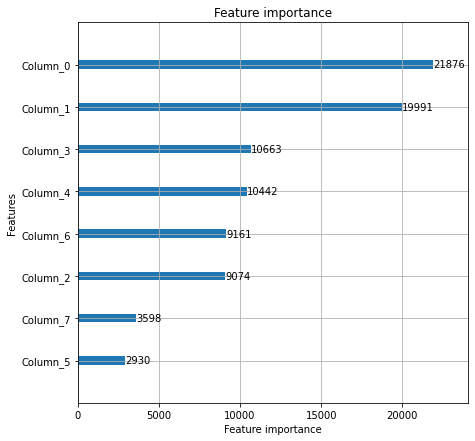

In [46]:
import lightgbm
lightgbm.plot_importance(model,figsize=(7,7))

In [31]:
(unique, counts) = np.unique(predict_lgbm, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[     0 159029]
 [     1  40971]]


In [55]:
pred=pd.DataFrame(predict_lgbm)
pred.to_csv('results.csv')

In [37]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=6000,
                                    early_stopping_rounds=5,
                                    verbose=False,
                                    
                                    loss_function='MultiClass',
                                    learning_rate=0.01,
                                    depth=7,
                                    class_weights={0:1,1:2.5},
                                    task_type = "GPU",devices='0:1')
catboost_model.fit(X_train, y_train)

predict = catboost_model.predict(test)
print(classification_model_evaluation(catboost_model,X_train,y_train,X_valid, y_valid))

####################### model Evalution started #######################
Train Accuracy: 0.7276949682503989 	 Test Accuracy: 0.704385746524571
Train Log Loss: 0.615472622050122 	 Test Log Loss: 0.6271332067404982
Train AUC: 0.6345164779610815 		 Test AUC: 0.5619359067470339
Train F1: 0.6989380761975497 		 Test F1: 0.6718901804362568
Train recall: 0.7276949682503989 	 Test recall: 0.704385746524571
Train precision: 0.6858451250541969 	 Test Precision: 0.6531628407931012

Train Classification report: 
              precision    recall  f1-score   support

           0       0.78      0.89      0.83    284455
           1       0.38      0.21      0.27     89093

    accuracy                           0.73    373548
   macro avg       0.58      0.55      0.55    373548
weighted avg       0.69      0.73      0.70    373548
 
 Test classification report: 
              precision    recall  f1-score   support

           0       0.77      0.88      0.82     94862
           1       0.28      

In [38]:
(unique, counts) = np.unique(predict, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[     0 175065]
 [     1  24935]]


In [41]:
model_RandomTree=RandomForestClassifier()
model_RandomTree.fit(X_train, y_train)
y_pred= model_RandomTree.predict(test) 

print(classification_model_evaluation(model_RandomTree,X_train,y_train,X_valid, y_valid))
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

####################### model Evalution started #######################
Train Accuracy: 0.9752240675897074 	 Test Accuracy: 0.7093408932113687
Train Log Loss: 0.16841960955900617 	 Test Log Loss: 0.7177694190446735
Train AUC: 0.9981819805608526 		 Test AUC: 0.524521547172993
Train F1: 0.9749696951772698 		 Test F1: 0.6669547168914578
Train recall: 0.9752240675897074 	 Test recall: 0.7093408932113687
Train precision: 0.9752237071806027 	 Test Precision: 0.6445823625762099

Train Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    284455
           1       0.98      0.92      0.95     89093

    accuracy                           0.98    373548
   macro avg       0.98      0.96      0.97    373548
weighted avg       0.98      0.98      0.97    373548
 
 Test classification report: 
              precision    recall  f1-score   support

           0       0.76      0.89      0.82     94862
           1       0.26   

In [42]:
model_RandomTree=DecisionTreeClassifier()
model_RandomTree.fit(X_train, y_train)
y_pred= model_RandomTree.predict(test) 

print(classification_model_evaluation(model_RandomTree,X_train,y_train,X_valid, y_valid))
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

####################### model Evalution started #######################
Train Accuracy: 0.9753043785537602 	 Test Accuracy: 0.6428519800509167
Train Log Loss: 0.03521478314244901 	 Test Log Loss: 12.135296081893486
Train AUC: 0.9983150442172599 		 Test AUC: 0.5078917644767553
Train F1: 0.9748443418669753 		 Test F1: 0.6426922879249556
Train recall: 0.9753043785537602 	 Test recall: 0.6428519800509167
Train precision: 0.9759971450562923 	 Test Precision: 0.6425329884159935

Train Classification report: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    284455
           1       1.00      0.90      0.95     89093

    accuracy                           0.98    373548
   macro avg       0.98      0.95      0.96    373548
weighted avg       0.98      0.98      0.97    373548
 
 Test classification report: 
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     94862
           1       0.25  

AttributeError: 'numpy.ndarray' object has no attribute 'head'